In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'4.8.1'

### Helper Functions

#### Rotating the image


In [3]:
def image_rotation(image,angle):
    height,width = image.shape[:2]
    center = (width/2,height/2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle,1.0)
    rotated_image = cv2.warpAffine(image,rotation_matrix,(width,height))
    return rotated_image


In [4]:

# load the images
image1 = cv2.imread('../Image/andrew.JPG')
# image2 = image_rotation(image1,-45)

In [5]:
rotation_angles = [0, 45, 90, 135, 180]  # Rotation angles (degrees)
scale_factors = [0.5, 1.0, 1.5, 2.0]  # Scale factors
low_light_factors=[-0.9,-0.7,0.7, 0.9] # Low light factors
blur_levels=[1,3,5,7,9,11,13,15,17,19,21] #blur kernel size example 3x3 kernel

In [6]:
def normalize_value(values):
    max_value = max(values)
    normalized_values = [val / max_value for val in values]
    return normalized_values

### FAST Implementation ###

Successfully write image at ../Image/Rotate//Rotation_Fast_0.jpg
Successfully write image at ../Image/Rotate//Rotation_Fast_45.jpg
Successfully write image at ../Image/Rotate//Rotation_Fast_90.jpg
Successfully write image at ../Image/Rotate//Rotation_Fast_135.jpg
Successfully write image at ../Image/Rotate//Rotation_Fast_180.jpg
Successfully write image at ../Image/Scale/Scale_Fast_0.5.jpg
Successfully write image at ../Image/Scale/Scale_Fast_1.0.jpg
Successfully write image at ../Image/Scale/Scale_Fast_1.5.jpg
Successfully write image at ../Image/Scale/Scale_Fast_2.0.jpg
Successfully write image at ../Image/Light/Light_Fast_-0.9.jpg
Successfully write image at ../Image/Light/Light_Fast_-0.7.jpg
Successfully write image at ../Image/Light/Light_Fast_0.7.jpg
Successfully write image at ../Image/Light/Light_Fast_0.9.jpg
Successfully write image at ../Image/Blur/Blur_Fast_1.jpg
Successfully write image at ../Image/Blur/Blur_Fast_3.jpg
Successfully write image at ../Image/Blur/Blur_Fast_5.j

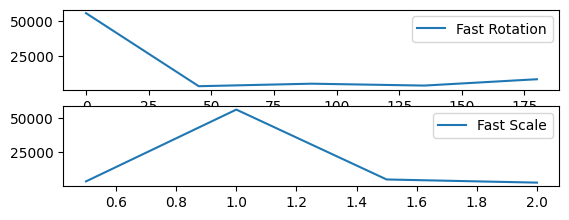

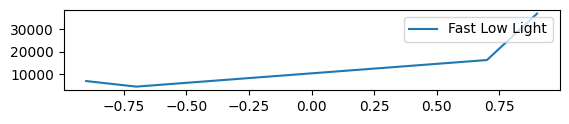

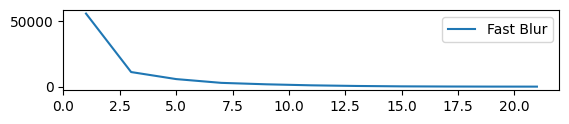

In [7]:

fast_rotation = list()
fast_scale = list()
fast_low_light = list()
fast_blur = list()
orb = cv2.ORB_create()
def detect_and_match(detector,image_org,keypoints_org,detectors_org,filter_image):
    # Detect FAST keypoints
    keypoints = detector.detect(filter_image, None)
    
    # Compute the descriptors (not used in this example)
    _, descriptors = orb.compute(filter_image, keypoints)

    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(detectors_org,descriptors)
   
    # Draw the image 
    Matched = cv2.drawMatches(image_org, keypoints_org, 
				filter_image, keypoints, matches,None,flags=2)

    return len(matches),Matched
def fast_filter(image,image_path):
    fast = cv2.FastFeatureDetector_create()
    keypoint1 = fast.detect(image)
    _,descriptors1=orb.compute(image,keypoint1)
    for  angle in rotation_angles:
        image_rot = image_rotation(image1,angle=-(angle))
        total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,image_rot)
        fast_rotation.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Rotate/Rotation_Fast_{angle}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Rotate//Rotation_Fast_{angle}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Rotate/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
             
    for  scale in scale_factors:
        scaled_image = cv2.resize(image, None, fx=scale, fy=scale)
        total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,scaled_image)
        fast_scale.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Scale/Scale_Fast_{scale}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Scale/Scale_Fast_{scale}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Scale/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for light in low_light_factors:
         illuminated_image = (image * light).astype(np.uint8)
         total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,illuminated_image)
         fast_low_light.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Light/Light_Fast_{light}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Light/Light_Fast_{light}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Light/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for blur in blur_levels:
         blurred_image = cv2.GaussianBlur(image, (blur, blur), 0)
         total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,blurred_image)
         fast_blur.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Blur/Blur_Fast_{blur}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Blur/Blur_Fast_{blur}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Blur/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    plt.subplot(4,1,1)
    plt.plot(rotation_angles,fast_rotation,label="Fast Rotation")
    plt.legend(loc="upper right",)
    plt.subplot(4,1,2)
    plt.plot(scale_factors,fast_scale,label="Fast Scale")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,3)
    plt.plot(low_light_factors,fast_low_light,label="Fast Low Light")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,4)
    plt.plot(blur_levels,fast_blur,label="Fast Blur")
    plt.legend(loc="upper right",)
    plt.show()
             
fast_filter(image1,"Image")
			
    
        
    

    
    


### ORB Implementation ###

Successfully write image at ../Image/Rotate//Rotation_ORB_0.jpg
Successfully write image at ../Image/Rotate//Rotation_ORB_45.jpg
Successfully write image at ../Image/Rotate//Rotation_ORB_90.jpg
Successfully write image at ../Image/Rotate//Rotation_ORB_135.jpg
Successfully write image at ../Image/Rotate//Rotation_ORB_180.jpg
Successfully write image at ../Image/Scale/Scale_ORB_0.5.jpg
Successfully write image at ../Image/Scale/Scale_ORB_1.0.jpg
Successfully write image at ../Image/Scale/Scale_ORB_1.5.jpg
Successfully write image at ../Image/Scale/Scale_ORB_2.0.jpg
Successfully write image at ../Image/Light/Light_ORB_-0.9.jpg
Successfully write image at ../Image/Light/Light_ORB_-0.7.jpg
Successfully write image at ../Image/Light/Light_ORB_0.7.jpg
Successfully write image at ../Image/Light/Light_ORB_0.9.jpg
Successfully write image at ../Image/Blur/Blur_ORB_1.jpg
Successfully write image at ../Image/Blur/Blur_ORB_3.jpg
Successfully write image at ../Image/Blur/Blur_ORB_5.jpg
Successfully 

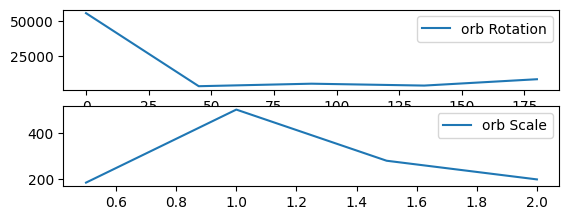

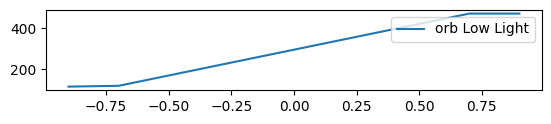

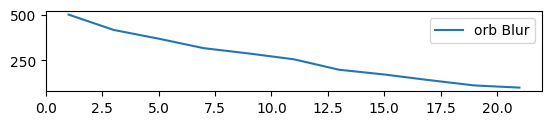

In [8]:
orb_rotation = list()
orb_scale = list()
orb_low_light = list()
orb_blur = list()
orb = cv2.ORB_create()
def detect_and_match(detector,image_org,keypoints_org,detectors_org,filter_image):
    # Detect FAST keypoints
    keypoints = detector.detect(filter_image, None)
    
    # Compute the descriptors (not used in this example)
    _, descriptors = detector.compute(filter_image, keypoints)
    # matching 
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(detectors_org,descriptors)
   
    # Draw the image 
    Matched = cv2.drawMatches(image_org, keypoints_org, 
				filter_image, keypoints, matches,None,flags=2)

    return len(matches),Matched

def orb_filter(image,image_path):
    fast = cv2.ORB_create()
    keypoint1,descriptors1=orb.detectAndCompute(image,None)
    for  angle in rotation_angles:
        image_rot = image_rotation(image1,angle=-(angle))
        total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,image_rot)
        orb_rotation.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Rotate/Rotation_ORB_{angle}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Rotate//Rotation_ORB_{angle}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Rotate/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
             
    for  scale in scale_factors:
        scaled_image = cv2.resize(image, None, fx=scale, fy=scale)
        total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,scaled_image)
        orb_scale.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Scale/Scale_ORB_{scale}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Scale/Scale_ORB_{scale}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Scale/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for light in low_light_factors:
         illuminated_image = (image * light).astype(np.uint8)
         total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,illuminated_image)
         orb_low_light.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Light/Light_ORB_{light}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Light/Light_ORB_{light}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Light/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for blur in blur_levels:
         blurred_image = cv2.GaussianBlur(image, (blur, blur), 0)
         total_match, Matched = detect_and_match(fast,image,keypoint1,descriptors1,blurred_image)
         orb_blur.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Blur/Blur_ORB_{blur}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Blur/Blur_ORB_{blur}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Blur/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
             
         
    plt.subplot(4,1,1)
    plt.plot(rotation_angles,fast_rotation,label="orb Rotation")
    plt.legend(loc="upper right",)
    plt.subplot(4,1,2)
    plt.plot(scale_factors,orb_scale,label="orb Scale")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,3)
    plt.plot(low_light_factors,orb_low_light,label="orb Low Light")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,4)
    plt.plot(blur_levels,orb_blur,label="orb Blur")
    plt.legend(loc="upper right",)
    plt.show() 
                
                
                    

orb_filter(image1,"Image")

#### SIFT Implementation ###

Successfully write image at ../Image/Rotate//Rotation_sift_0.jpg
Successfully write image at ../Image/Rotate//Rotation_sift_45.jpg
Successfully write image at ../Image/Rotate//Rotation_sift_90.jpg
Successfully write image at ../Image/Rotate//Rotation_sift_135.jpg
Successfully write image at ../Image/Rotate//Rotation_sift_180.jpg
Successfully write image at ../Image/Scale/Scale_sift_0.5.jpg
Successfully write image at ../Image/Scale/Scale_sift_1.0.jpg
Successfully write image at ../Image/Scale/Scale_sift_1.5.jpg
Successfully write image at ../Image/Scale/Scale_sift_2.0.jpg
Successfully write image at ../Image/Light/Light_sift_-0.9.jpg
Successfully write image at ../Image/Light/Light_sift_-0.7.jpg
Successfully write image at ../Image/Light/Light_sift_0.7.jpg
Successfully write image at ../Image/Light/Light_sift_0.9.jpg
Successfully write image at ../Image/Blur/Blur_sift_1.jpg
Successfully write image at ../Image/Blur/Blur_sift_3.jpg
Successfully write image at ../Image/Blur/Blur_sift_5.j

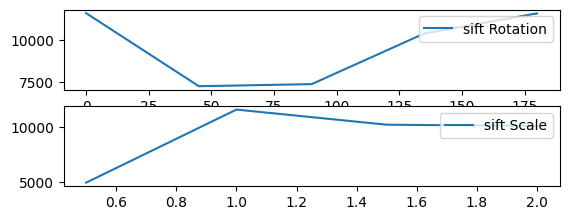

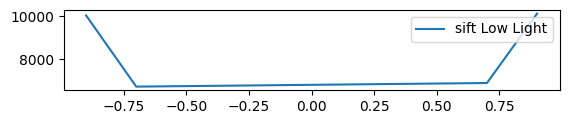

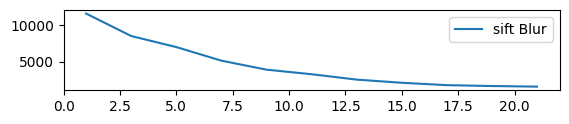

In [9]:
sift_rotation = list()
sift_scale = list()
sift_low_light = list()
sift_blur = list()
sift = cv2.SIFT_create()
def detect_and_match_sift(detector,image_org,keypoints_org,detectors_org,filter_image):
    # Detect sift keypoints and Compute the descriptors 
    keypoints, descriptors = detector.detectAndCompute(filter_image, None)
    # matching 
    # finding the matching ones using KNN
    index_params = dict(algorithm = 0,trees=20)
    search_params = dict(checks=150)
    flann = cv2.FlannBasedMatcher(index_params,search_params)
#     print(f"Type of descriptors: {type(descriptors)} and Detectors_org: {type(detectors_org)}")
    matches = flann.knnMatch(descriptors,detectors_org,k=2)
    
    # Draw the image 
    
    Matched = cv2.drawMatchesKnn(
         image_org,
         keypoints_org,
         filter_image,
         keypoints,
         matches,
         outImg=None,
         flags=0
    )

    return len(matches),Matched

def sift_filter(image,image_path):
    keypoint1,descriptors1=sift.detectAndCompute(image,None)
    for  angle in rotation_angles:
        image_rot = image_rotation(image1,angle=-(angle))
        total_match, Matched = detect_and_match_sift(sift,image,keypoint1,descriptors1,image_rot)
        sift_rotation.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Rotate/Rotation_sift_{angle}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Rotate//Rotation_sift_{angle}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Rotate/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
             
    for  scale in scale_factors:
        scaled_image = cv2.resize(image, None, fx=scale, fy=scale)
        total_match, Matched = detect_and_match_sift(sift,image,keypoint1,descriptors1,scaled_image)
        sift_scale.append(total_match)
        if image_path:
             if(cv2.imwrite(f"../{image_path}/Scale/Scale_sift_{scale}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Scale/Scale_sift_{scale}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Scale/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for light in low_light_factors:
         illuminated_image = (image * light).astype(np.uint8)
         total_match, Matched = detect_and_match_sift(sift,image,keypoint1,descriptors1,illuminated_image)
         sift_low_light.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Light/Light_sift_{light}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Light/Light_sift_{light}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Light/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    for blur in blur_levels:
         blurred_image = cv2.GaussianBlur(image, (blur, blur), 0)
         total_match, Matched = detect_and_match_sift(sift,image,keypoint1,descriptors1,blurred_image)
         sift_blur.append(total_match)
         if image_path:
             if(cv2.imwrite(f"../{image_path}/Blur/Blur_sift_{blur}.jpg",Matched)):
                  print(f"Successfully write image at ../{image_path}/Blur/Blur_sift_{blur}.jpg")
             else:
                  print("Unsuccessful write image - Please Create Path: Image/Blur/")
         else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
             
         
    plt.subplot(4,1,1)
    plt.plot(rotation_angles,sift_rotation,label="sift Rotation")
    plt.legend(loc="upper right",)
    plt.subplot(4,1,2)
    plt.plot(scale_factors,sift_scale,label="sift Scale")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,3)
    plt.plot(low_light_factors,sift_low_light,label="sift Low Light")
    plt.legend(loc="upper right",)
    plt.show()
    plt.subplot(4,1,4)
    plt.plot(blur_levels,sift_blur,label="sift Blur")
    plt.legend(loc="upper right",)
    plt.show() 
                
                
                    

sift_filter(image1,"Image")

##### Harris Corner Detection ###

Successfully write image at ../Image/Rotate/Rotation_Harris_0.jpg
Successfully write image at ../Image/Rotate/Rotation_Harris_45.jpg
Successfully write image at ../Image/Rotate/Rotation_Harris_90.jpg
Successfully write image at ../Image/Rotate/Rotation_Harris_135.jpg
Successfully write image at ../Image/Rotate/Rotation_Harris_180.jpg
Successfully write image at ../Image/Scale/Scale_Harris_0.5.jpg
Successfully write image at ../Image/Scale/Scale_Harris_1.0.jpg
Successfully write image at ../Image/Scale/Scale_Harris_1.5.jpg
Successfully write image at ../Image/Scale/Scale_Harris_2.0.jpg
Successfully write image at ../Image/Light//Light_Harris_-0.9.jpg
Successfully write image at ../Image/Light//Light_Harris_-0.7.jpg
Successfully write image at ../Image/Light//Light_Harris_0.7.jpg
Successfully write image at ../Image/Light//Light_Harris_0.9.jpg
Successfully write image at ../Image/Blur/Blur_Harris_1.jpg
Successfully write image at ../Image/Blur/Blur_Harris_3.jpg
Successfully write image a

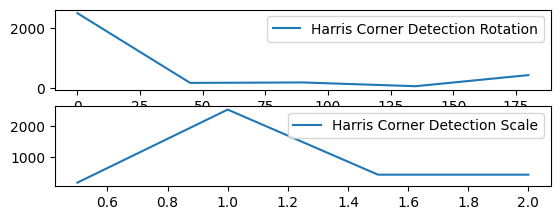

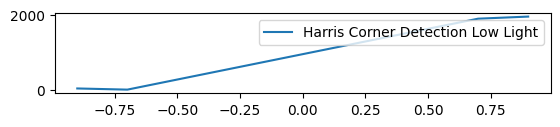

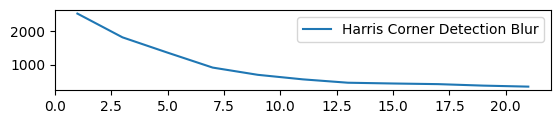

In [10]:
corners_rotation = []
corners_scale = []
corners_low_light = []
corners_blur = []
# low_light_factors=[-0.9,-0.7,-0.1,0.1,0.7, 0.9]
orb = cv2.ORB_create()
harris_block_size = 2  # Block size for Harris corner detection
harris_ksize = 3  # Aperture parameter for Harris corner detection
harris_k = 0.04  # Harris detector free parameter
image1=cv2.imread("../Image/andrew.JPG",0)
if image1.dtype != np.uint8:
    image1 = cv2.convertScaleAbs(image1)
# Initialize a Harris corner detector
harris = cv2.cornerHarris(image1, blockSize=2, ksize=3, k=0.04)

# Threshold the Harris response to identify keypoints
keypoints_org = np.where(harris > 0.01 * harris.max())
keypoints_org = [cv2.KeyPoint(float(x), float(y), 5) for x, y in zip(*keypoints_org)]
def detect_and_match_harris(image, keypoints_org):
    # Compute the Harris response for the input image
    harris = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

    # Threshold the Harris response to identify keypoints
    keypoints = np.where(harris > 0.01 * harris.max())
    keypoints = [cv2.KeyPoint(float(x), float(y), 5) for x, y in zip(*keypoints)]
    
    
    
    # Create a BFMatcher with Hamming distance for binary descriptors
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
   
    # Compute descriptors (Harris does not provide descriptors, so we'll use ORB)
    orb = cv2.ORB_create()
    _, descriptors_org = orb.compute(image1, keypoints_org)
    _, descriptors = orb.compute(image, keypoints)
    
    # Match descriptors
    matches = matcher.match(descriptors_org, descriptors)
    
    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Draw the matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints_org, image, keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return len(matches),matched_image

def harris_filter(image,image_path=False):
    # keypoint1,descriptors1=orb.detectAndCompute(image,None)
    for angle in rotation_angles:
    # # Rotate the original image
        image_rot = image_rotation(image, angle=-(angle))
        # Detect corners and store the count
        # num_corners,keypoints_harris = detect_corners(image_rot)
        total_match, Matched = detect_and_match_harris(image_rot,keypoints_org)
        corners_rotation.append(total_match)
        if image_path:
            if(cv2.imwrite(f"../{image_path}/Rotate/Rotation_Harris_{angle}.jpg",Matched)):
                print(f"Successfully write image at ../{image_path}/Rotate/Rotation_Harris_{angle}.jpg")
            else:
                  print("Unsuccessful write image - Please Create Path: Image/Rotate/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()

    # Scale variation
    for scale_factor in scale_factors:
        # Resize the original image
        scaled_image = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor)
        
        # Detect corners and store the count
        
        total_match, Matched = detect_and_match_harris(scaled_image,keypoints_org)
        corners_scale.append(total_match)
        if image_path:
            if(cv2.imwrite(f"../{image_path}/Scale/Scale_Harris_{scale_factor}.jpg",Matched)):
                print(f"Successfully write image at ../{image_path}/Scale/Scale_Harris_{scale_factor}.jpg")
            else:
                  print("Unsuccessful write image - Please Create Path: Image/Scale/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()

    # Low light illumination variation
    for low_light_factor in low_light_factors:
        # Apply illumination reduction
        low_light_image = (image * low_light_factor).astype(np.uint8)
        
        # Detect corners and store the count
       
        total_match, Matched = detect_and_match_harris(low_light_image,keypoints_org)
        corners_low_light.append(total_match)
        if image_path:
            if(cv2.imwrite(f"../{image_path}/Light/Light_Harris_{low_light_factor}.jpg",Matched)):
                print(f"Successfully write image at ../{image_path}/Light//Light_Harris_{low_light_factor}.jpg")
            else:
                  print("Unsuccessful write image - Please Create Path: Image/Light/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()

    # Blur variation
    for blur in blur_levels:
        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(image1, (blur, blur), 0)
        
        # Detect corners and store the count
       
        
        total_match, Matched = detect_and_match_harris(blurred_image,keypoints_org)
        corners_blur.append(total_match)
        if image_path:
            if(cv2.imwrite(f"../{image_path}/Blur/Blur_Harris_{blur}.jpg",Matched)):
                print(f"Successfully write image at ../{image_path}/Blur/Blur_Harris_{blur}.jpg")
            else:
                  print("Unsuccessful write image - Please Create Path: Image/Blur/")
        else:
             cv2.imshow("Result Image",Matched)
             cv2.waitKey(0)
             cv2.destroyAllWindows()
    plt.subplot(4,1,1)
    plt.plot(rotation_angles,corners_rotation,label="Harris Corner Detection Rotation")
    plt.legend(loc="upper right")
    plt.subplot(4,1,2)
    plt.plot(scale_factors,corners_scale,label="Harris Corner Detection Scale")
    plt.legend(loc="upper right")
    plt.show()
    plt.subplot(4,1,3)
    plt.plot(low_light_factors,corners_low_light,label="Harris Corner Detection Low Light")
    plt.legend(loc="upper right")
    plt.show()
    plt.subplot(4,1,4)
    plt.plot(blur_levels,corners_blur,label="Harris Corner Detection Blur")
    plt.legend(loc="upper right")

harris_filter(image1,"Image")
        
        


### Ploting Everything

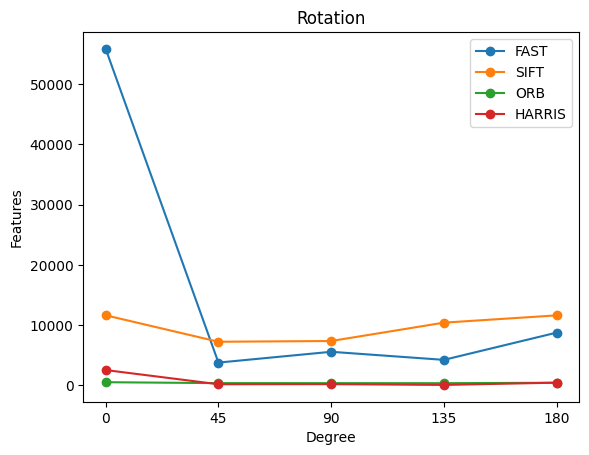

In [11]:
# plt.figure(figsize=(12,8))
# plt.subplot(2,2,1)
plt.plot(rotation_angles,fast_rotation,marker='o', linestyle='-',label='Fast Filter')
plt.plot(rotation_angles,sift_rotation,marker='o', linestyle='-',label='Sift Filter')
plt.plot(rotation_angles,orb_rotation,marker='o', linestyle='-',label='ORB Filter')
plt.plot(rotation_angles,corners_rotation,marker='o', linestyle='-',label='Corners Filter')
plt.title("Rotation")
plt.xlabel("Degree")
plt.ylabel("Features")
plt.xticks(rotation_angles)
plt.legend(['FAST','SIFT','ORB','HARRIS'])
plt.savefig("../Image/Plotting/rotation.jpg",dpi=300)
plt.show()

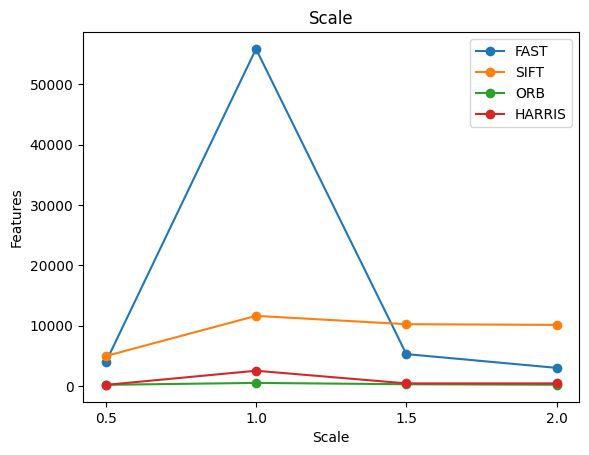

In [12]:
plt.plot(scale_factors,fast_scale,marker='o', linestyle='-',label='Fast Filter')
plt.plot(scale_factors,sift_scale,marker='o', linestyle='-',label='Sift Filter')
plt.plot(scale_factors,orb_scale,marker='o', linestyle='-',label='ORB Filter')
plt.plot(scale_factors,corners_scale,marker='o', linestyle='-',label='Corners Filter')
plt.title("Scale")
plt.xlabel("Scale")
plt.ylabel("Features")
plt.xticks(scale_factors)
plt.legend(['FAST','SIFT','ORB','HARRIS'])
plt.savefig("../Image/Plotting/scale.jpg",dpi=300)
plt.show()

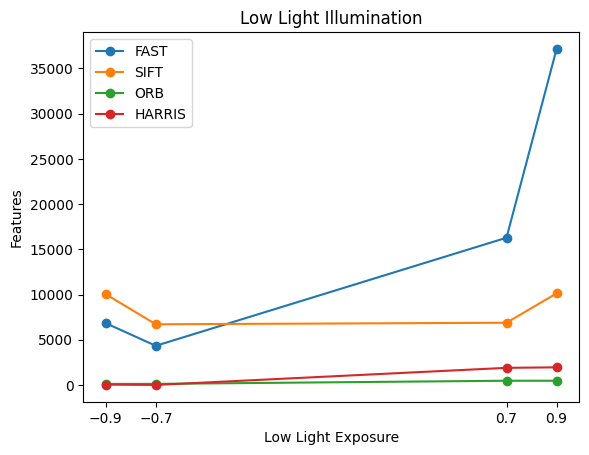

In [13]:
plt.plot(low_light_factors,fast_low_light,marker='o', linestyle='-',label='Fast Filter')
plt.plot(low_light_factors,sift_low_light,marker='o', linestyle='-',label='Sift Filter')
plt.plot(low_light_factors,orb_low_light,marker='o', linestyle='-',label='ORB Filter')
plt.plot(low_light_factors,corners_low_light,marker='o', linestyle='-',label='Corners Filter')
plt.title("Low Light Illumination")
plt.xlabel("Low Light Exposure")
plt.ylabel("Features")
plt.xticks(low_light_factors)
plt.legend(['FAST','SIFT','ORB','HARRIS'])
plt.savefig("../Image/Plotting/low_light_illumination.jpg",dpi=300)
plt.show()

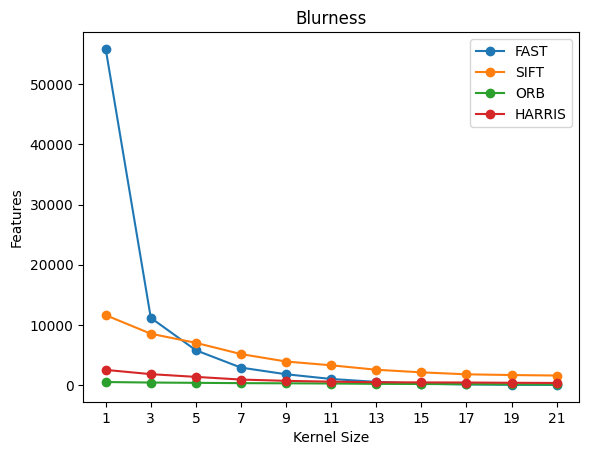

In [14]:
plt.plot(blur_levels,fast_blur,marker='o', linestyle='-',label='Fast Filter')
plt.plot(blur_levels,sift_blur,marker='o', linestyle='-',label='Sift Filter')
plt.plot(blur_levels,orb_blur,marker='o', linestyle='-',label='ORB Filter')
plt.plot(blur_levels,corners_blur,marker='o', linestyle='-',label='Corners Filter')
plt.title("Blurness")
plt.xlabel("Kernel Size")
plt.ylabel("Features")
plt.xticks(blur_levels)
plt.legend(['FAST','SIFT','ORB','HARRIS'])
plt.savefig("../Image/Plotting/blur.jpg",dpi=300)
plt.show()